## ***Exploratory Data Analysis for happiness data***

In [1]:
import pandas as pd
import os

In [2]:
os.chdir("../")
print(os.getcwd())

/home/v4lentin4/etl_workshop003


In [3]:
df_2015 = pd.read_csv("data/2015.csv")
df_2016 = pd.read_csv("data/2016.csv")
df_2017 = pd.read_csv("data/2017.csv")
df_2018 = pd.read_csv("data/2018.csv")
df_2019 = pd.read_csv("data/2019.csv")

Explain columns here:
This data is from the world hapinness data

#### 2015

In [4]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df_2015.columns = df_2015.columns.str.lower()

Withe info() method we validate null values, df shape, coolumns data types, columns

In [6]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        158 non-null    object 
 1   region                         158 non-null    object 
 2   happiness rank                 158 non-null    int64  
 3   happiness score                158 non-null    float64
 4   standard error                 158 non-null    float64
 5   economy (gdp per capita)       158 non-null    float64
 6   family                         158 non-null    float64
 7   health (life expectancy)       158 non-null    float64
 8   freedom                        158 non-null    float64
 9   trust (government corruption)  158 non-null    float64
 10  generosity                     158 non-null    float64
 11  dystopia residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df_2015.describe()

,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Extracting columns

Based in a country given that there should be a record per country

In [8]:
print(f"Number of duplicates: {df_2015.duplicated(subset ='country').sum()}")

Number of duplicates: 0


### 2016

In [9]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [10]:
df_2016.columns = df_2016.columns.str.lower()

In [11]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        157 non-null    object 
 1   region                         157 non-null    object 
 2   happiness rank                 157 non-null    int64  
 3   happiness score                157 non-null    float64
 4   lower confidence interval      157 non-null    float64
 5   upper confidence interval      157 non-null    float64
 6   economy (gdp per capita)       157 non-null    float64
 7   family                         157 non-null    float64
 8   health (life expectancy)       157 non-null    float64
 9   freedom                        157 non-null    float64
 10  trust (government corruption)  157 non-null    float64
 11  generosity                     157 non-null    float64
 12  dystopia residual              157 non-null    flo

In [12]:
df_2016.describe()

,happiness rank,happiness score,lower confidence interval,upper confidence interval,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [13]:
print(f"Number of duplicates: {df_2016.duplicated(subset ='country').sum()}")

Number of duplicates: 0


### 2017

In [14]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
df_2017.columns = df_2017.columns.str.lower()

In [16]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        155 non-null    object 
 1   happiness.rank                 155 non-null    int64  
 2   happiness.score                155 non-null    float64
 3   whisker.high                   155 non-null    float64
 4   whisker.low                    155 non-null    float64
 5   economy..gdp.per.capita.       155 non-null    float64
 6   family                         155 non-null    float64
 7   health..life.expectancy.       155 non-null    float64
 8   freedom                        155 non-null    float64
 9   generosity                     155 non-null    float64
 10  trust..government.corruption.  155 non-null    float64
 11  dystopia.residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [17]:
df_2017.describe()

,happiness.rank,happiness.score,whisker.high,whisker.low,economy..gdp.per.capita.,family,health..life.expectancy.,freedom,generosity,trust..government.corruption.,dystopia.residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [18]:
print(f"Number of duplicates: {df_2017.duplicated(subset ='country').sum()}")

Number of duplicates: 0


### 2018

In [19]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [20]:
df_2018.columns = df_2018.columns.str.lower()

In [21]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall rank                  156 non-null    int64  
 1   country or region             156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp per capita                156 non-null    float64
 4   social support                156 non-null    float64
 5   healthy life expectancy       156 non-null    float64
 6   freedom to make life choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Note that there´s 1 null value in perceptions of corruptionn

In [22]:
df_2018.describe()

,overall rank,score,gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [23]:
print(f"Number of duplicates: {df_2018.duplicated(subset ='country or region').sum()}")

Number of duplicates: 0


### 2019

In [24]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
df_2019.columns = df_2019.columns.str.lower()

In [26]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall rank                  156 non-null    int64  
 1   country or region             156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp per capita                156 non-null    float64
 4   social support                156 non-null    float64
 5   healthy life expectancy       156 non-null    float64
 6   freedom to make life choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [27]:
df_2019.describe()

,overall rank,score,gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [28]:
print(f"Number of duplicates: {df_2019.duplicated(subset ='country or region').sum()}")

Number of duplicates: 0


## Merge

Explicar que significan las columnas eliminadas

First, eliminate columns that are not in every dataset and cannot be imputed or just implicate redundancy of info.

In [29]:
df_2015= df_2015.drop(columns=["happiness rank", "standard error", "dystopia residual"])
df_2016= df_2016.drop(columns=["happiness rank", "lower confidence interval", "upper confidence interval", "dystopia residual"])
df_2017= df_2017.drop(columns=["happiness.rank", "whisker.high", "whisker.low", "dystopia.residual"])
df_2018= df_2018.drop(columns="overall rank")
df_2019= df_2019.drop(columns="overall rank")

In [30]:
rename_dict = {
    "country or region": "country",
    "score": "happiness_score",
    "happiness score": "happiness_score",
    "happiness.score": "happiness_score",
    "economy (gdp per capita)": "gdp_per_capita",
    "gdp per capita": "gdp_per_capita",
    "economy..gdp.per.capita.": "gdp_per_capita",
    "family": "social_support",
    "social support": "social_support",
    "health (life expectancy)": "healthy_life_expectancy",
    "healthy life expectancy": "healthy_life_expectancy",
    "health..life.expectancy.": "healthy_life_expectancy",
    "freedom to make life choices": "freedom",
    "trust (government corruption)": "perceptions_of_corruption",
    "trust..government.corruption.": "perceptions_of_corruption",
    "perceptions of corruption":"perceptions_of_corruption"
}

df_2015 = df_2015.rename(columns=rename_dict)
df_2016 = df_2016.rename(columns=rename_dict)
df_2017 = df_2017.rename(columns=rename_dict)
df_2018 = df_2018.rename(columns=rename_dict)
df_2019 = df_2019.rename(columns=rename_dict)

In [31]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    155 non-null    object 
 1   happiness_score            155 non-null    float64
 2   gdp_per_capita             155 non-null    float64
 3   social_support             155 non-null    float64
 4   healthy_life_expectancy    155 non-null    float64
 5   freedom                    155 non-null    float64
 6   generosity                 155 non-null    float64
 7   perceptions_of_corruption  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.8+ KB


In [32]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    156 non-null    object 
 1   happiness_score            156 non-null    float64
 2   gdp_per_capita             156 non-null    float64
 3   social_support             156 non-null    float64
 4   healthy_life_expectancy    156 non-null    float64
 5   freedom                    156 non-null    float64
 6   generosity                 156 non-null    float64
 7   perceptions_of_corruption  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [33]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    156 non-null    object 
 1   happiness_score            156 non-null    float64
 2   gdp_per_capita             156 non-null    float64
 3   social_support             156 non-null    float64
 4   healthy_life_expectancy    156 non-null    float64
 5   freedom                    156 non-null    float64
 6   generosity                 156 non-null    float64
 7   perceptions_of_corruption  156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [34]:
print("Updated Column Names:")
print(df_2015.columns.tolist())

Updated Column Names:
['country', 'region', 'happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'perceptions_of_corruption', 'generosity']


In [35]:
print("Updated Column Names:")
print(df_2017.columns.tolist())

Updated Column Names:
['country', 'happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption']


In [36]:
df_2015["year"] = 2015
df_2016["year"] = 2016
df_2017["year"] = 2017
df_2018["year"] = 2018
df_2019["year"] = 2019

In [37]:
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]
df = pd.concat(dataframes)
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,NaN,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,NaN,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,NaN,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,NaN,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    782 non-null    object 
 1   region                     315 non-null    object 
 2   happiness_score            782 non-null    float64
 3   gdp_per_capita             782 non-null    float64
 4   social_support             782 non-null    float64
 5   healthy_life_expectancy    782 non-null    float64
 6   freedom                    782 non-null    float64
 7   perceptions_of_corruption  781 non-null    float64
 8   generosity                 782 non-null    float64
 9   year                       782 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 67.2+ KB


## EDA

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df_region = pd.concat([df_2015, df_2016])
df_region = df_region[["country", "region"]]

In [41]:
df_region["country"] = df_region["country"].str.lower()
df_region["region"] = df_region["region"].str.lower()
df_region = df_region.groupby('country', as_index=False).agg({'region': 'first'})
df["country"] = df["country"].str.lower()
df["region"] = df["region"].str.lower()

In [42]:
country_counts = df['country'].value_counts()

rare_countries = country_counts[country_counts < 5].index

df_rare = df[df['country'].isin(rare_countries)]

In [43]:
df_rare['count'] = df_rare['country'].map(country_counts)

df_rare = df_rare[["country", "count"]]

df_rare = df_rare.groupby('country').size().reset_index(name='count')

df_rare.sort_values(by="count", ascending= False)

/tmp/ipykernel_48550/3452083110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rare['count'] = df_rare['country'].map(country_counts)


,country,count
0,angola,4
2,central african republic,4
10,macedonia,4
6,hong kong,4
11,mozambique,4
8,laos,4
9,lesotho,4
24,taiwan,4
20,south sudan,4
21,sudan,4


In [44]:
df_rare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  28 non-null     object
 1   count    28 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 580.0+ bytes


In [45]:
country_replacements = {
    'macedonia': 'north macedonia',
    'trinidad & tobago': 'trinidad and tobago',
    'taiwan province of china': 'taiwan',
    'north cyprus': 'northern cyprus',
    'hong kong s.a.r., china': 'hong kong'
}

In [46]:
df['country'] = df['country'].replace(country_replacements)
df_region['country'] = df_region['country'].replace(country_replacements)

In [47]:
paises = list(df_region['country'])
regiones = list(df_region['region'])

diccionario = dict(zip(paises, regiones))
print(diccionario)

{'afghanistan': 'southern asia', 'albania': 'central and eastern europe', 'algeria': 'middle east and northern africa', 'angola': 'sub-saharan africa', 'argentina': 'latin america and caribbean', 'armenia': 'central and eastern europe', 'australia': 'australia and new zealand', 'austria': 'western europe', 'azerbaijan': 'central and eastern europe', 'bahrain': 'middle east and northern africa', 'bangladesh': 'southern asia', 'belarus': 'central and eastern europe', 'belgium': 'western europe', 'belize': 'latin america and caribbean', 'benin': 'sub-saharan africa', 'bhutan': 'southern asia', 'bolivia': 'latin america and caribbean', 'bosnia and herzegovina': 'central and eastern europe', 'botswana': 'sub-saharan africa', 'brazil': 'latin america and caribbean', 'bulgaria': 'central and eastern europe', 'burkina faso': 'sub-saharan africa', 'burundi': 'sub-saharan africa', 'cambodia': 'southeastern asia', 'cameroon': 'sub-saharan africa', 'canada': 'north america', 'central african repub

In [48]:
df['region'] = df['country'].map(df_region.set_index('country')['region'])

In [49]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
count,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2016.993606
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,1.417364
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,2016.000000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2017.000000
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2018.000000
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [50]:
df.describe(include="object")

,country,region
count,782,781
unique,164,10
top,switzerland,sub-saharan africa
freq,5,195


In [51]:
print("\n==== Missing Values per Column: ====\n")
print(df.isnull().sum().sort_values(ascending = False))


==== Missing Values per Column: ====

region                       1
perceptions_of_corruption    1
country                      0
happiness_score              0
social_support               0
gdp_per_capita               0
healthy_life_expectancy      0
freedom                      0
generosity                   0
year                         0
dtype: int64


In [52]:
df.isnull()

df[df.isnull().any(axis=1)]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
19,united arab emirates,middle east and northern africa,6.774,2.096,0.776,0.670,0.284,NaN,0.186,2018
119,gambia,NaN,4.516,0.308,0.939,0.428,0.382,0.167,0.269,2019


In [53]:
df[df['perceptions_of_corruption'].isna()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
19,united arab emirates,middle east and northern africa,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [54]:
df[(df['country'] == 'united arab emirates')]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
19,united arab emirates,middle east and northern africa,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2015
27,united arab emirates,middle east and northern africa,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2016
20,united arab emirates,middle east and northern africa,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,2017
19,united arab emirates,middle east and northern africa,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,2018
20,united arab emirates,middle east and northern africa,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,2019


In [55]:
df['perceptions_of_corruption'] = df.groupby('country')['perceptions_of_corruption'].transform(lambda x: x.fillna(x.median()))

In [56]:
df["region"].unique()

array(['western europe', 'north america', 'australia and new zealand',
       'middle east and northern africa', 'latin america and caribbean',
       'southeastern asia', 'central and eastern europe', 'eastern asia',
       'sub-saharan africa', 'southern asia', nan], dtype=object)

In [57]:
nulos = df[df.isnull().any(axis=1)]
nulos["country"].unique()

array(['gambia'], dtype=object)

In [58]:
df = df.dropna()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    781 non-null    object 
 1   region                     781 non-null    object 
 2   happiness_score            781 non-null    float64
 3   gdp_per_capita             781 non-null    float64
 4   social_support             781 non-null    float64
 5   healthy_life_expectancy    781 non-null    float64
 6   freedom                    781 non-null    float64
 7   perceptions_of_corruption  781 non-null    float64
 8   generosity                 781 non-null    float64
 9   year                       781 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 67.1+ KB


In [60]:
print(df.nunique())

country                      163
region                        10
happiness_score              715
gdp_per_capita               742
social_support               731
healthy_life_expectancy      704
freedom                      696
perceptions_of_corruption    636
generosity                   663
year                           5
dtype: int64


In [63]:

# Sort countries by happiness score
sorted_df = df.sort_values('happiness_score', ascending=False)

# Top 5 and Bottom 5 countries
top_5 = sorted_df.head(5)
bottom_5 = sorted_df.tail(5)

/tmp/ipykernel_48550/617973250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


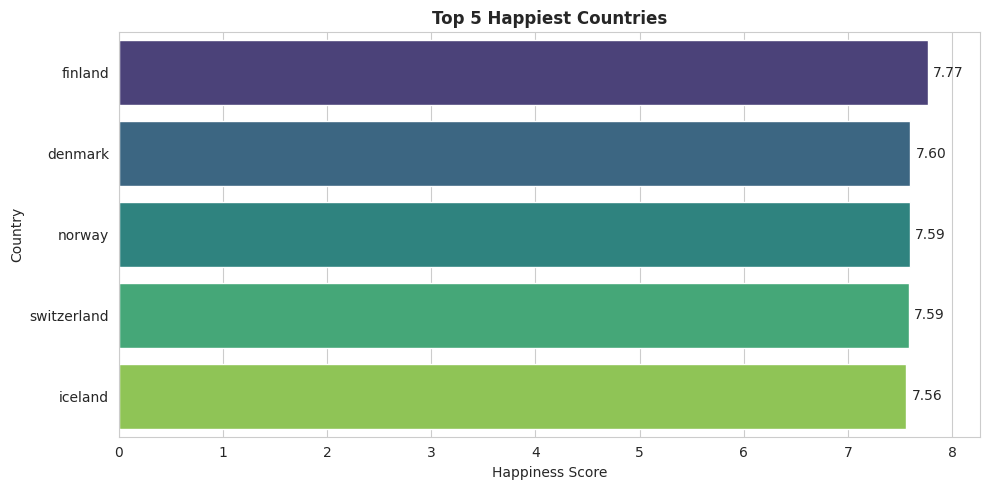

In [68]:

top_5 = df.sort_values(by='happiness_score', ascending=False)

# Eliminar países duplicados si los hubiera (por si tienes múltiples años o entradas por país)
top_5 = top_5.drop_duplicates(subset='country')

# Seleccionar los 5 primeros países únicos
top_5 = top_5.head(5)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_5,
    x='happiness_score',
    y='country',
    palette='viridis'
)
plt.title('Top 5 Happiest Countries', fontweight='bold')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.xlim(0, top_5['happiness_score'].max() + 0.5)

# Añadir etiquetas con los valores
for i, (score, country) in enumerate(zip(top_5['happiness_score'], top_5['country'])):
    plt.text(score + 0.05, i, f'{score:.2f}', va='center')

plt.tight_layout()
plt.show()


/tmp/ipykernel_48550/2029582758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


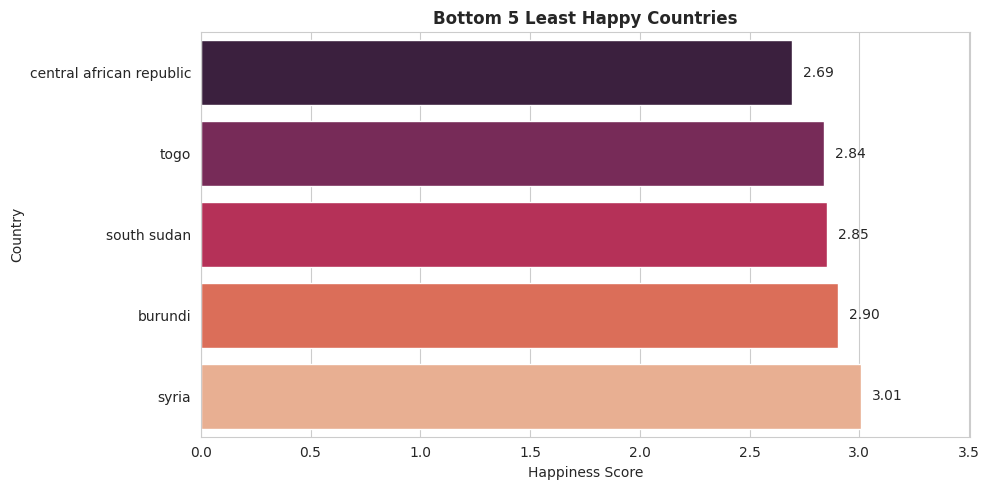

In [69]:
bottom_5 = df.sort_values(by='happiness_score', ascending=True)

# Eliminar países duplicados si los hubiera
bottom_5 = bottom_5.drop_duplicates(subset='country')

# Seleccionar los 5 primeros países únicos (los más bajos)
bottom_5 = bottom_5.head(5)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(
    data=bottom_5,
    x='happiness_score',
    y='country',
    palette='rocket'
)
plt.title('Bottom 5 Least Happy Countries', fontweight='bold')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.xlim(0, bottom_5['happiness_score'].max() + 0.5)

# Añadir etiquetas con los valores
for i, (score, country) in enumerate(zip(bottom_5['happiness_score'], bottom_5['country'])):
    plt.text(score + 0.05, i, f'{score:.2f}', va='center')

plt.tight_layout()
plt.show()


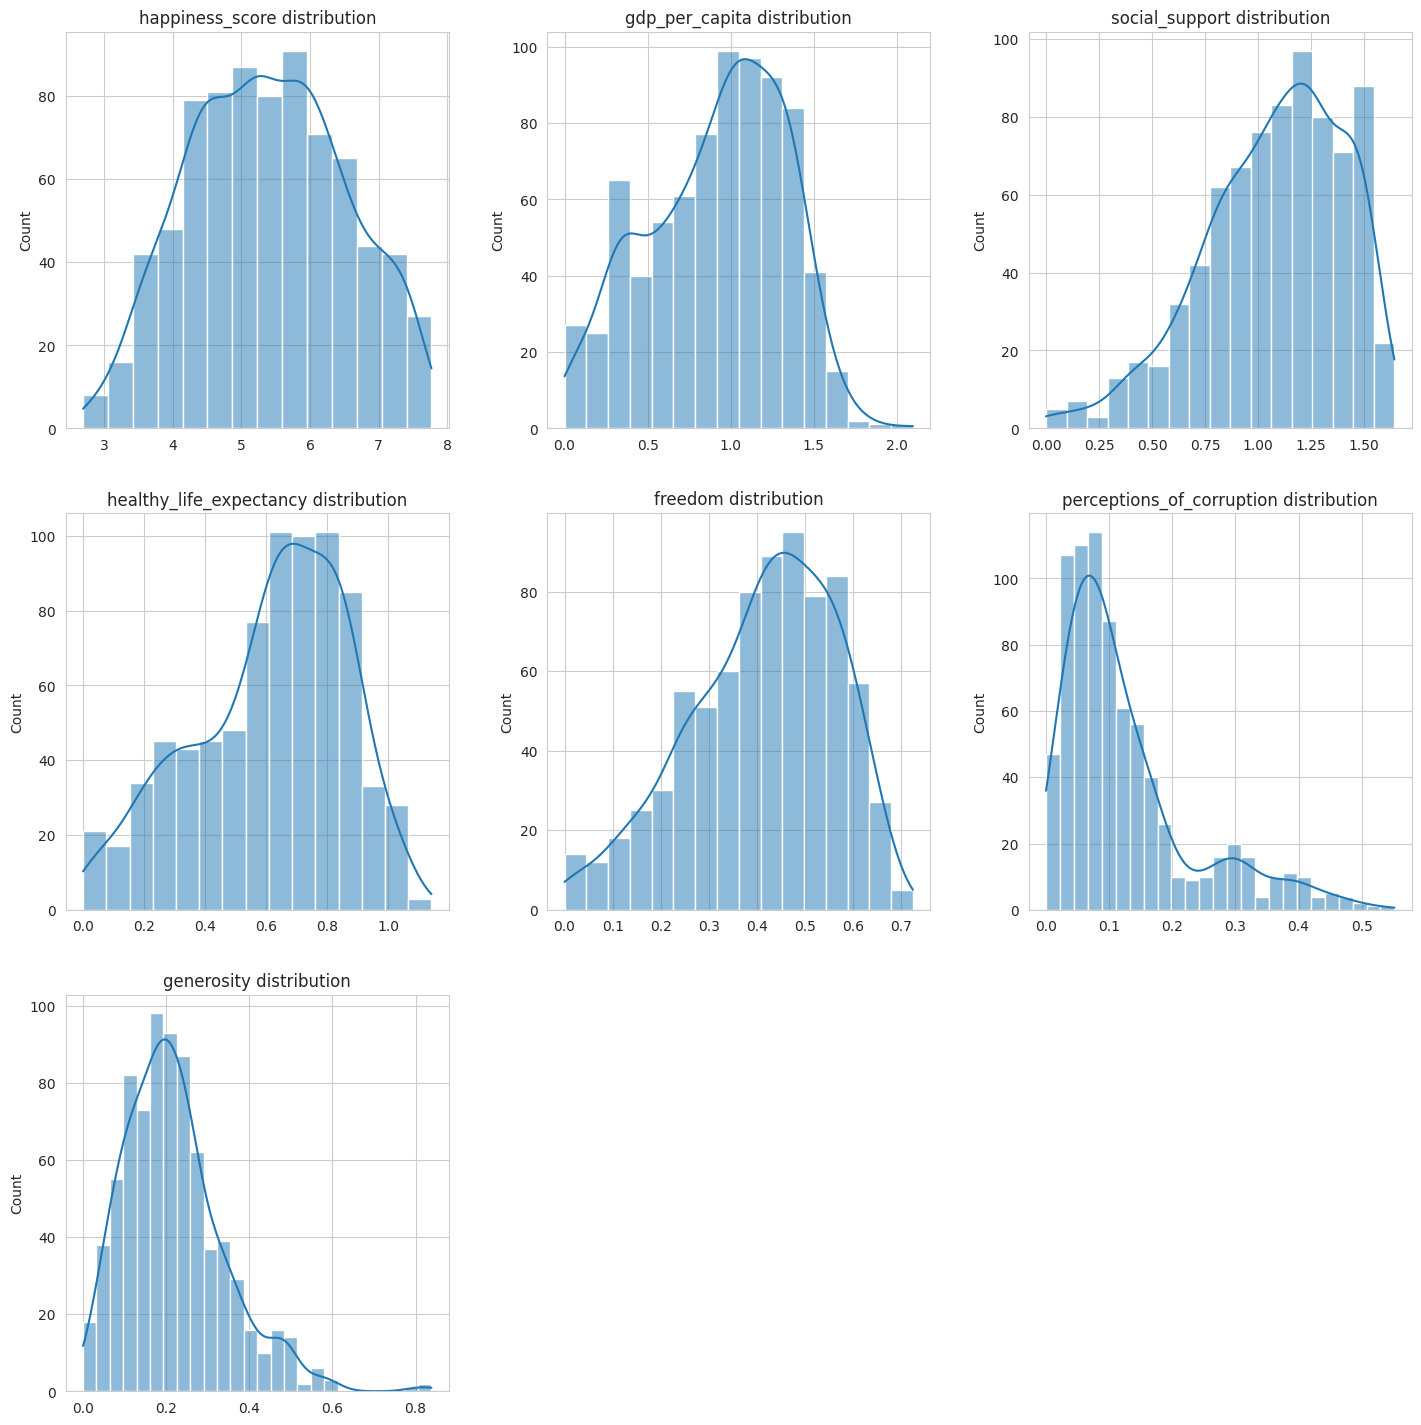

In [64]:
numeric_cols = df.select_dtypes(include='float').columns

n_cols = 3
n_rows = (len(numeric_cols)) // n_cols + (1 if len(numeric_cols) % n_cols else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.tight_layout(pad=4.0) 

axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes): 
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col} distribution')
        axes[i].set_xlabel('')
    
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.show()


<Axes: title={'center': 'Happiness Trend per Year'}, xlabel='year'>

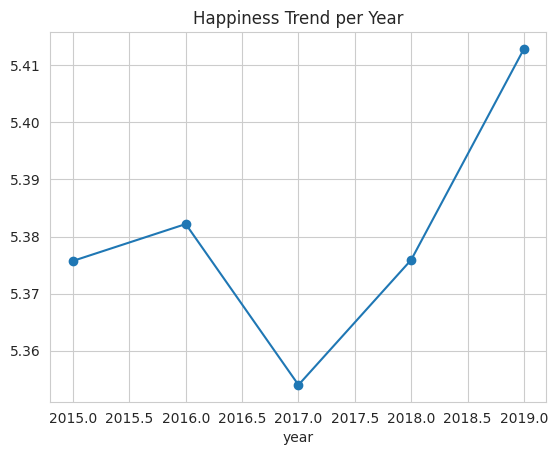

In [65]:
df.groupby('year')['happiness_score'].mean().plot(
    title='Happiness Trend per Year',
    marker='o'
)

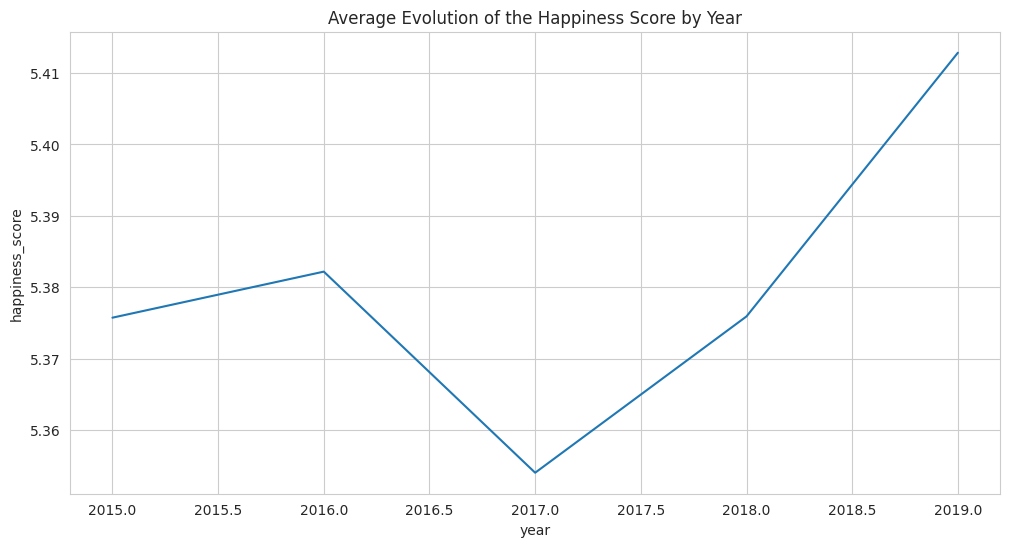

In [66]:
# Evolución promedio por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='happiness_score', estimator='mean', errorbar=None)
plt.title('Average Evolution of the Happiness Score by Year')
plt.show()

In [66]:
# Top 10 países con mayor cambio (positivo/negativo)
pivot_df = df.pivot(index='country', columns='year', values='happiness_score')
pivot_df['change'] = pivot_df.max(axis=1) - pivot_df.min(axis=1)
top_changers = pivot_df.sort_values('change', ascending=False).head(10)

In [67]:
top_changers

year,2015,2016,2017,2018,2019,change
country,,,,,,
venezuela,6.810,6.084,5.250,4.806,4.707,2.103
benin,3.340,3.484,3.657,4.141,4.883,1.543
ivory coast,3.655,3.916,4.180,4.671,4.944,1.289
togo,2.839,3.303,3.495,3.999,4.085,1.246
algeria,5.605,6.355,5.872,5.295,5.211,1.144
lesotho,4.898,NaN,3.808,3.808,3.802,1.096
liberia,4.571,3.622,3.533,3.495,3.975,1.076
honduras,4.788,4.871,5.181,5.504,5.860,1.072
guinea,3.656,3.607,3.507,3.964,4.534,1.027


/tmp/ipykernel_48550/887595505.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=sorted_df, x='country', y='happiness_score',


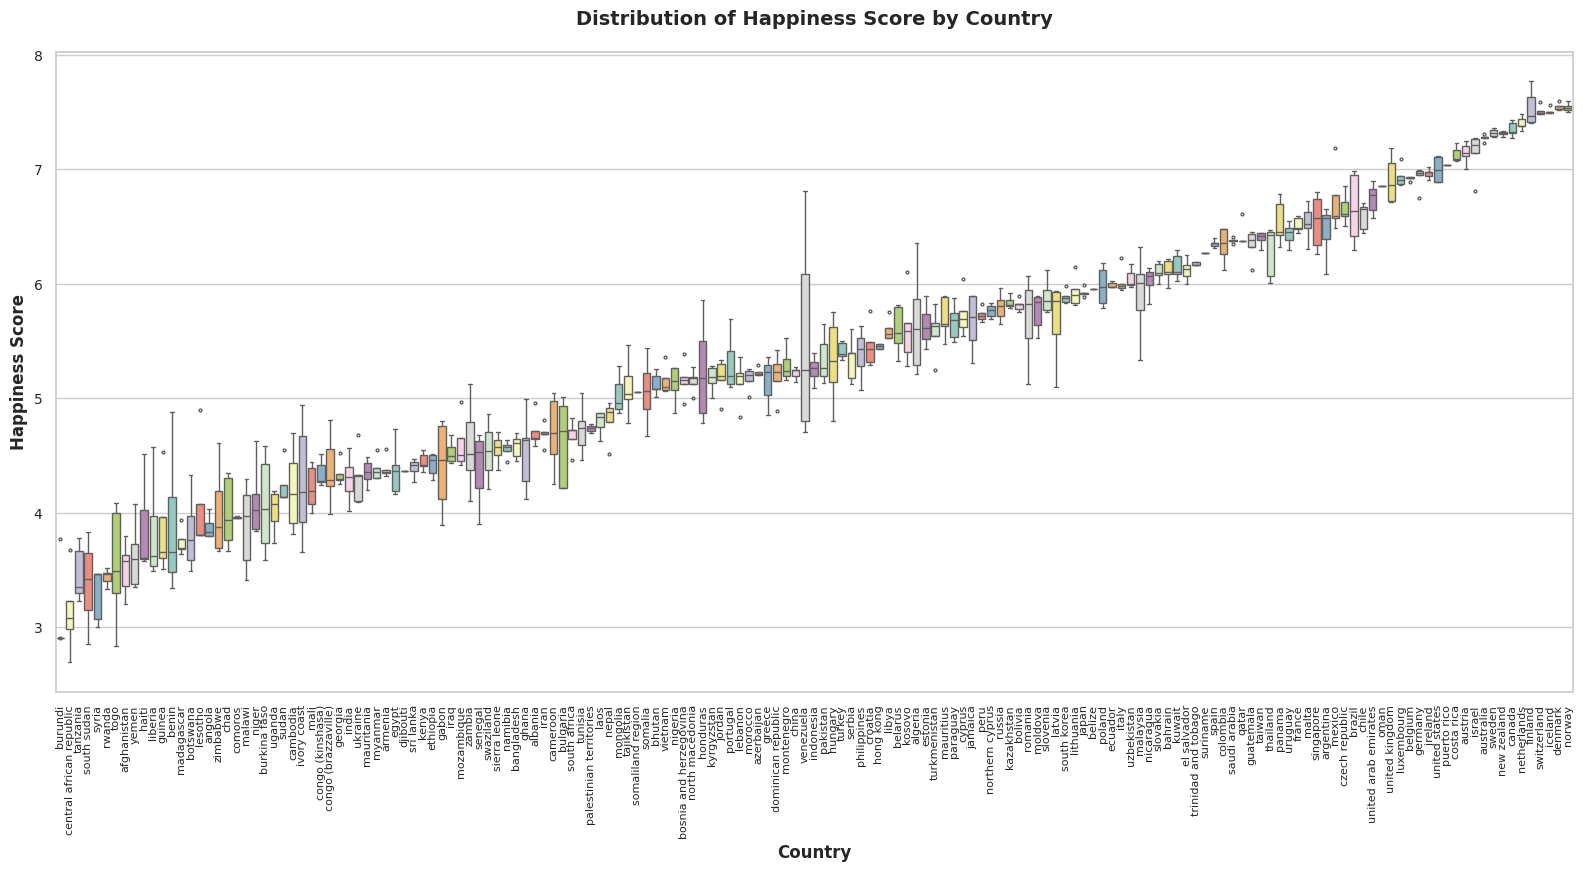

In [70]:
sns.set(style="whitegrid", rc={"figure.figsize":(16, 8)})
plt.figure(figsize=(16, 10))

# Ordena los países por mediana (opcional pero útil)
sorted_countries = df.groupby('country')['happiness_score'].median().sort_values().index
sorted_df = df.set_index('country').loc[sorted_countries].reset_index()

# Crea el boxplot ordenado
ax = sns.boxplot(data=sorted_df, x='country', y='happiness_score', 
                 palette="Set3", linewidth=1, fliersize=2)

# Mejoras de visualización
plt.xticks(rotation=90, fontsize=8)  # Reduce el tamaño de fuente
plt.yticks(fontsize=10)
plt.xlabel("Country", fontsize=12, fontweight='bold')
plt.ylabel("Happiness Score", fontsize=12, fontweight='bold')
plt.title("Distribution of Happiness Score by Country", 
          fontsize=14, pad=20, fontweight='bold')

# Ajusta los márgenes y layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Deja más espacio para las etiquetas


# Alternativa: mostrar solo cada n-ésima etiqueta
# for i, label in enumerate(ax.get_xticklabels()):
#     if i % 5 != 0:  # muestra cada 5 países
#         label.set_visible(False)

plt.show()

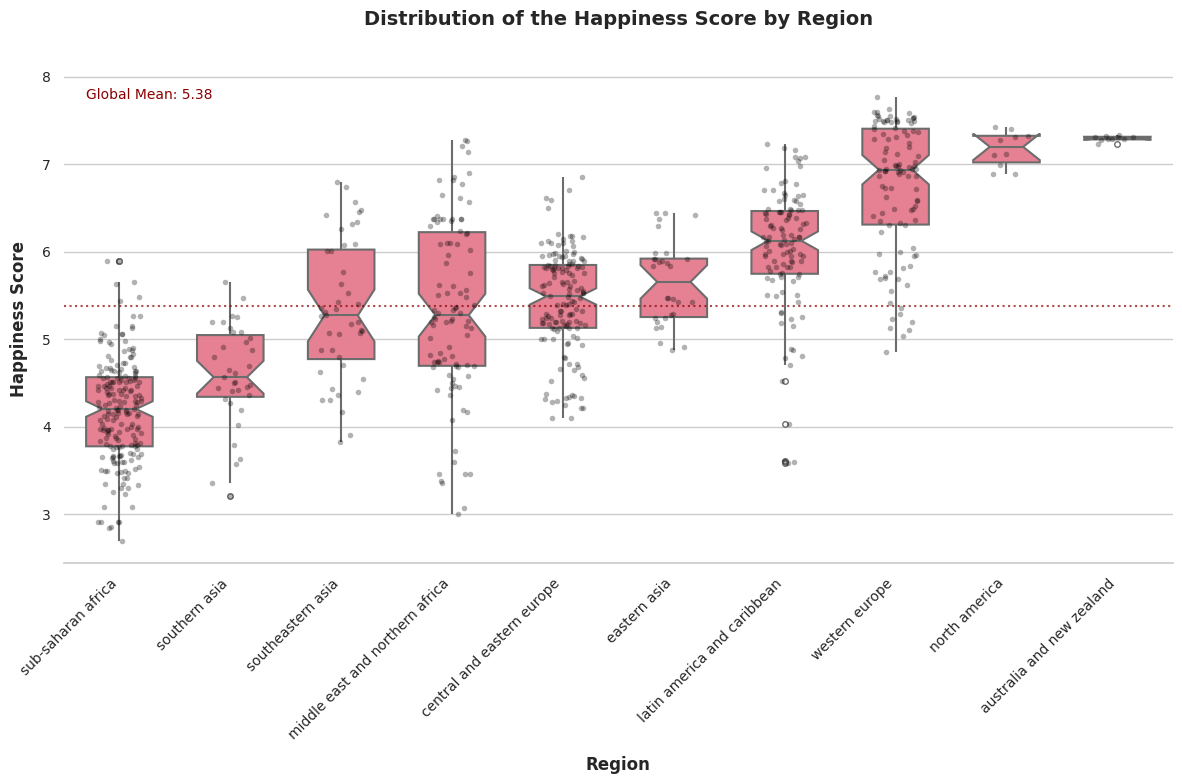

In [71]:
plt.style.use('seaborn-v0_8-pastel')
sns.set_palette("husl")  # Paleta de colores armoniosa

# Tamaño y proporción
plt.figure(figsize=(12, 8))

# Ordenar por mediana de felicidad
region_order = df.groupby('region')['happiness_score'].median().sort_values().index

# Boxplot mejorado
ax = sns.boxplot(
    data=df,
    x='region',
    y='happiness_score',
    order=region_order,
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    notch=True,  # Muestra intervalos de confianza
    showcaps=False  # Estilo más limpio
)

# Mejoras estéticas
plt.title('Distribution of the Happiness Score by Region\n', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=12, labelpad=10, fontweight='bold')

# Rotación y formato de etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Línea horizontal con la media global
global_mean = df['happiness_score'].mean()
ax.axhline(global_mean, color='darkred', linestyle=':', alpha=0.7, linewidth=1.5)
ax.text(0.02, 0.95, f'Global Mean: {global_mean:.2f}', 
        transform=ax.transAxes, color='darkred', fontsize=10)

# Añadir puntos para las medias
sns.stripplot(
    data=df,
    x='region',
    y='happiness_score',
    order=region_order,
    color='black',
    size=4,
    alpha=0.3,
    jitter=0.2
)

# Mejorar el layout
plt.tight_layout()
sns.despine(left=True)  # Elimina el borde izquierdo para más elegancia

# Mostrar el gráfico
plt.show()

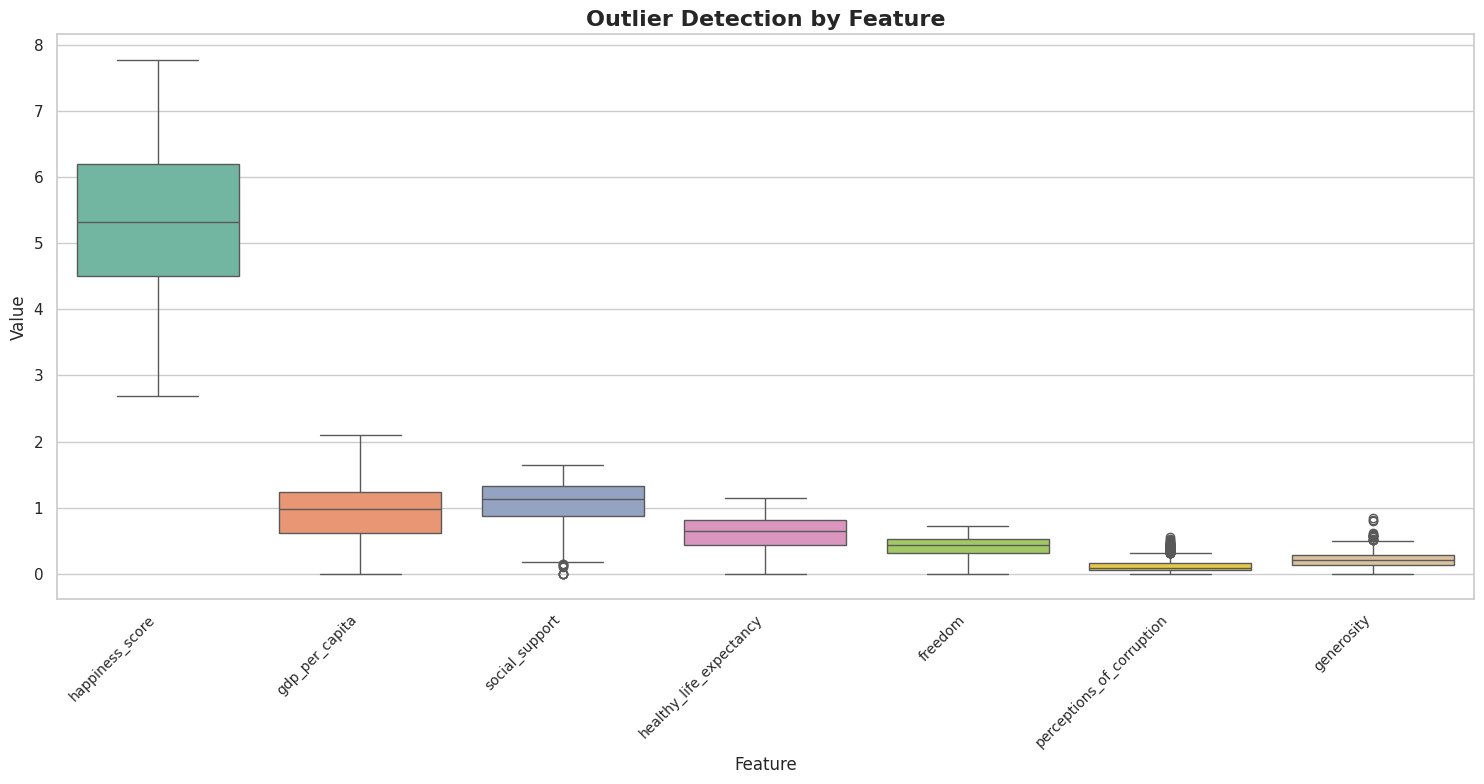

In [72]:
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(15, 8))

# Boxplot con seaborn para mejor personalización
sns.boxplot(data=df[numeric_cols], palette='Set2')

# Etiquetas y título en inglés
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Outlier Detection by Feature', fontsize=16, fontweight='bold')
plt.ylabel('Value', fontsize=12)
plt.xlabel('Feature', fontsize=12)

# Ajuste del diseño
plt.tight_layout()
plt.show()



/tmp/ipykernel_48550/4020971412.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='happiness_score', palette='pastel')


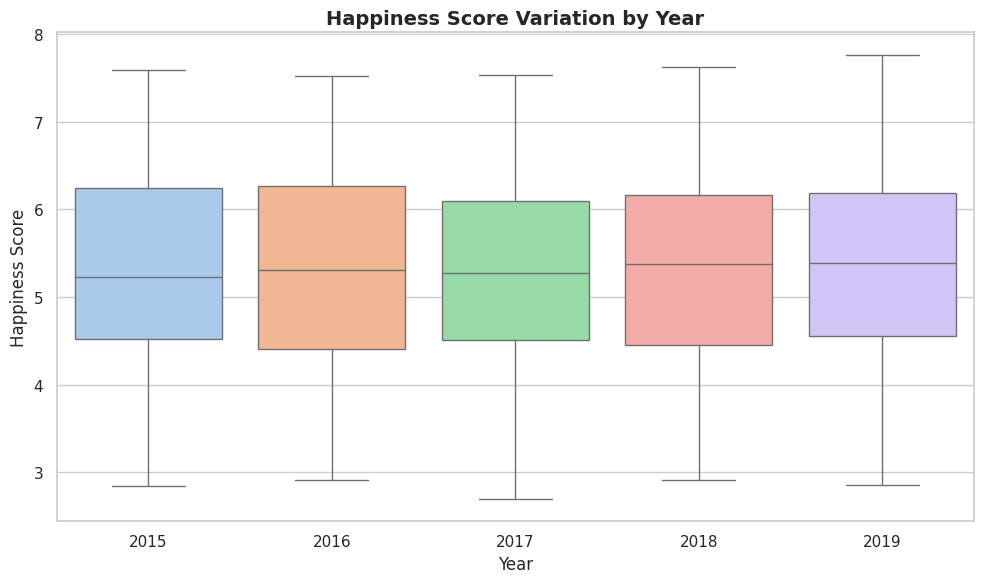

In [73]:
sns.set(style="whitegrid")

# Crear figura para el gráfico por año
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='happiness_score', palette='pastel')

# Títulos y etiquetas en inglés
plt.title('Happiness Score Variation by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.tight_layout()
plt.show()


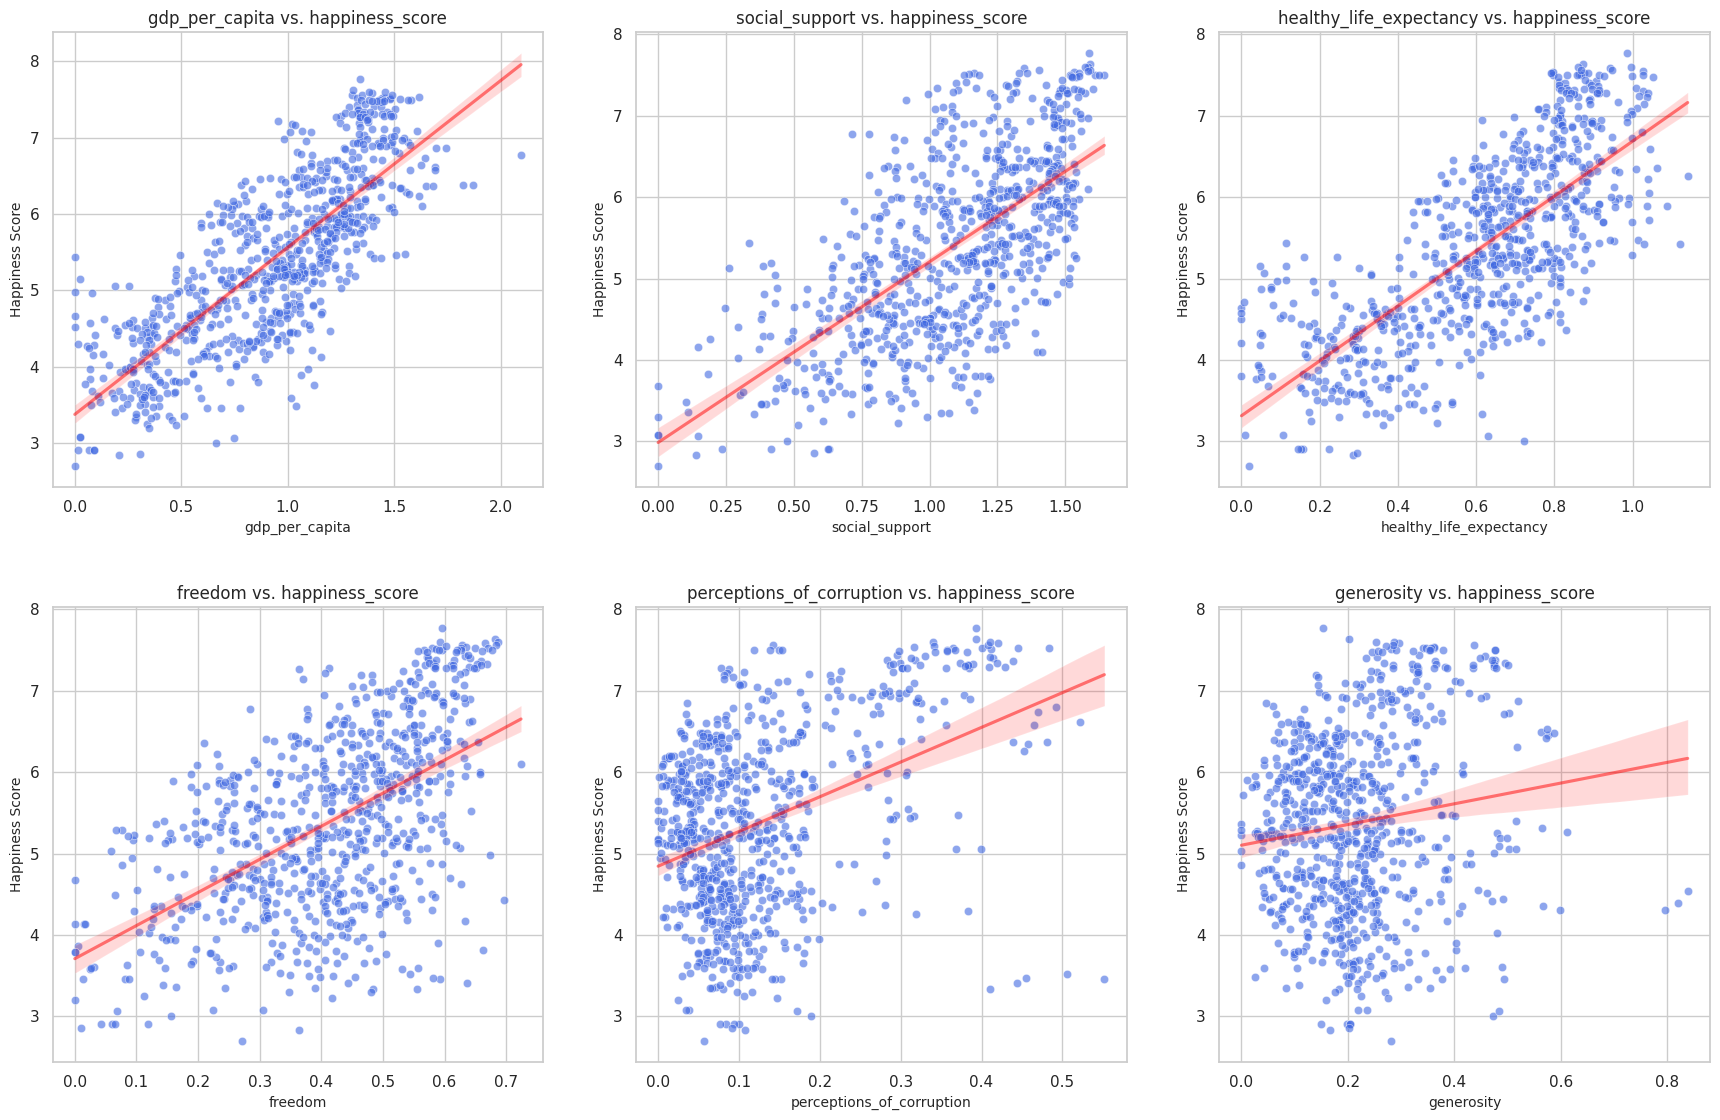

In [92]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))  # Tamaño ajustable según necesidad

# Seleccionar columnas numéricas (excluyendo country y year)
cols = df.columns[3:9]  # Ajusta según tu estructura exacta

# Crear subplots en una matriz 2x3
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  # 2 filas, 3 columnas
    sns.scatterplot(data=df, x=col, y='happiness_score', alpha=0.6, color='royalblue')
    
    # Añadir línea de regresión para ver tendencia
    sns.regplot(data=df, x=col, y='happiness_score', 
                scatter=False, color='red', line_kws={'alpha':0.5})
    
    plt.title(f'{col} vs. happiness_score', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Happiness Score', fontsize=10)

# Ajustar layout y mostrar
plt.tight_layout(pad=3.0)  # Espacio entre subplots
plt.show()

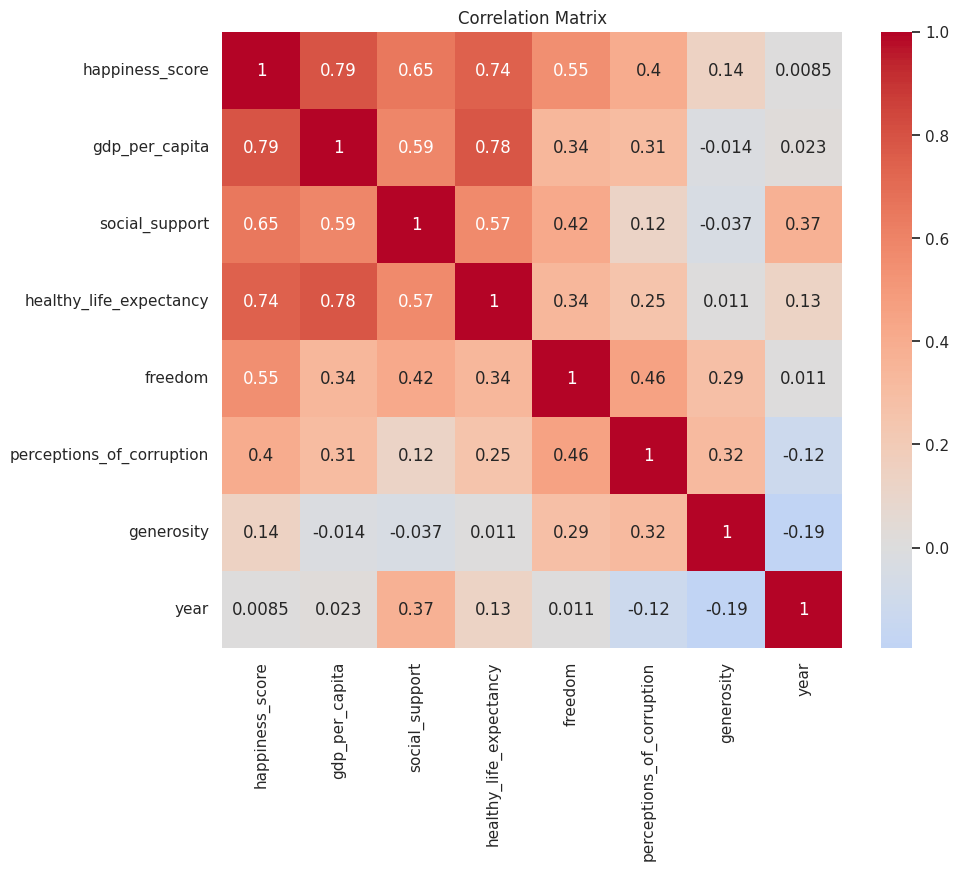

In [74]:
# Matriz de correlación
cols = df.select_dtypes(include=['float', 'int']).columns
corr_matrix = df[cols].corr()

# Heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

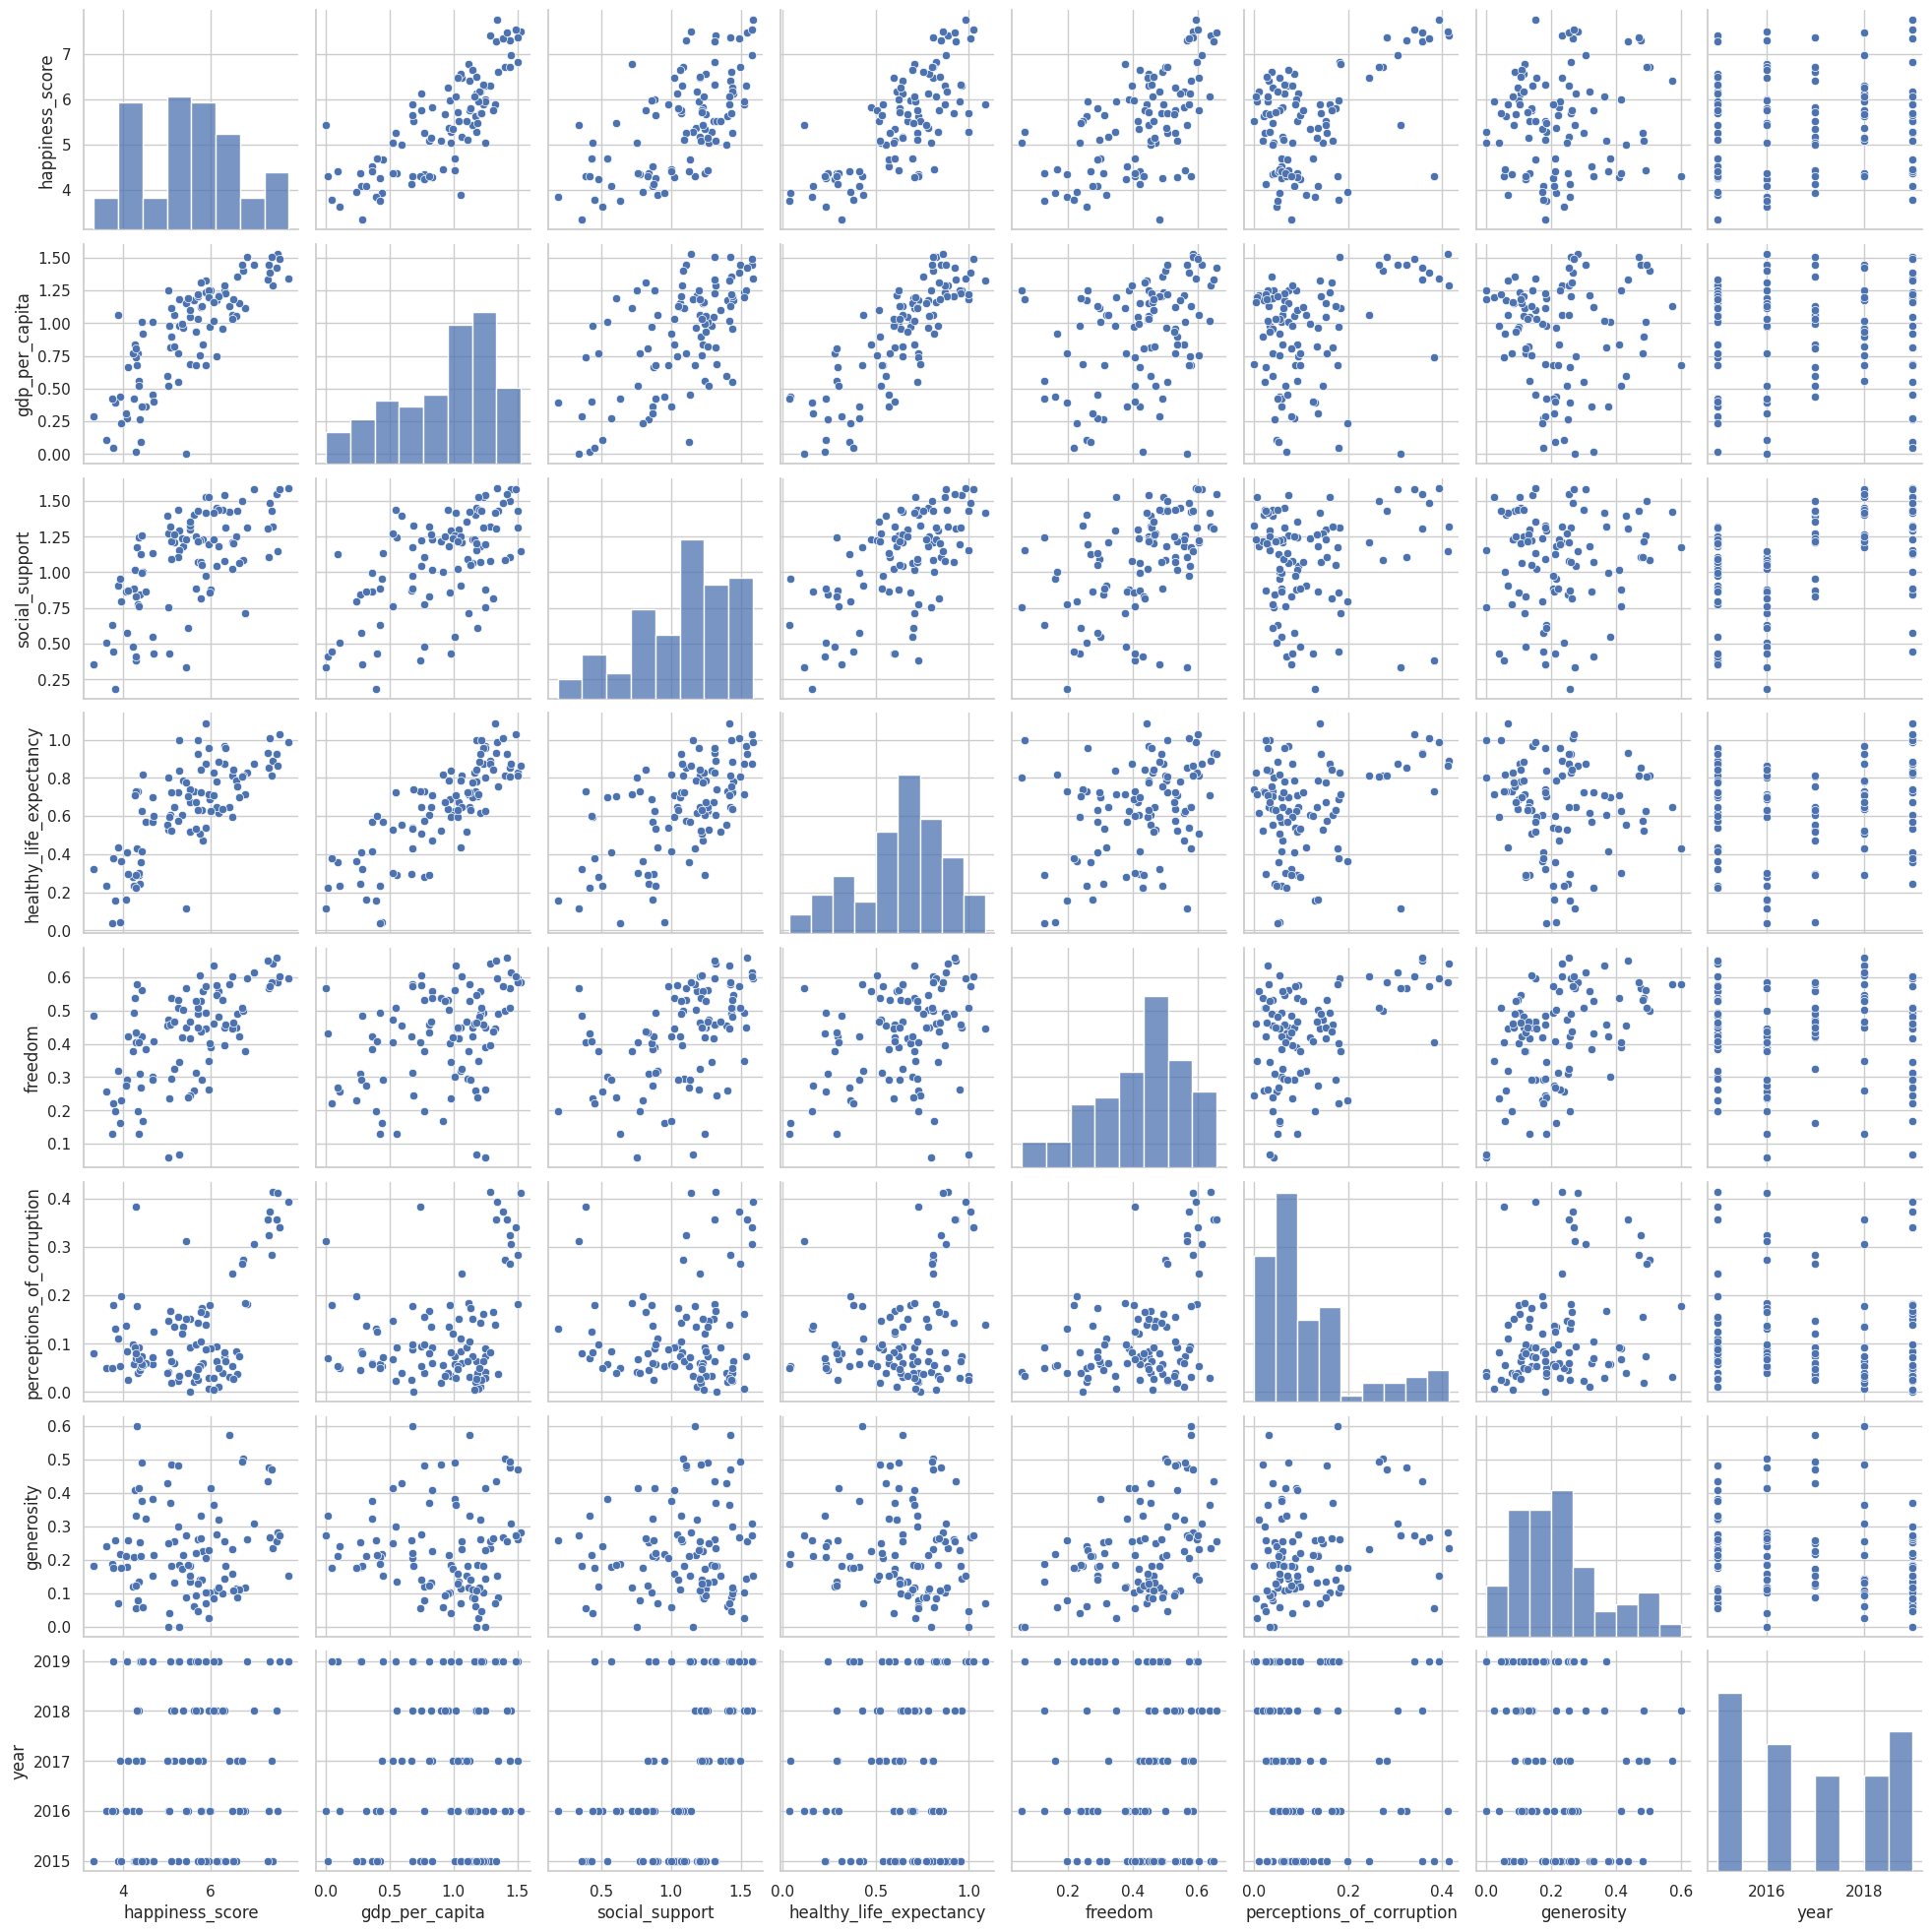

In [78]:
sample_df = df.sample(100) if len(df) > 100 else df
sns.pairplot(sample_df[cols])
plt.show()

══════════════════════════════════════════════════════════════════════
                ANÁLISIS DE VARIANZA (Threshold = 0.1)                
══════════════════════════════════════════════════════════════════════
                 Variable  Varianza  Cumple_Threshold  Threshold
           gdp_per_capita  0.165452              True        0.1
           social_support  0.108577              True        0.1
  healthy_life_expectancy  0.061614             False        0.1
                  freedom  0.023371             False        0.1
               generosity  0.014959             False        0.1
perceptions_of_corruption  0.011239             False        0.1


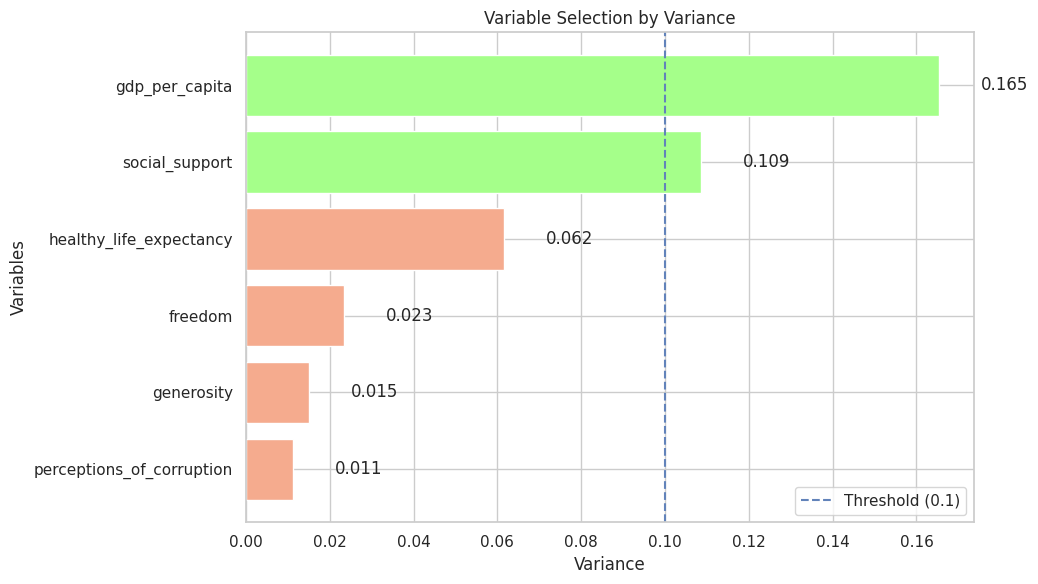

In [75]:
from sklearn.feature_selection import VarianceThreshold

# 1. Configuración y cálculo
threshold = 0.1
selected_columns = df.columns[3:9]  # Ajusta según tus necesidades
var_thresh = VarianceThreshold(threshold=threshold)
var_thresh.fit(df[selected_columns])

# 2. Crear un DataFrame informativo
results = pd.DataFrame({
    'Variable': selected_columns,
    'Varianza': var_thresh.variances_,
    'Cumple_Threshold': var_thresh.get_support(),
    'Threshold': threshold
})

# 3. Ordenar por varianza (opcional pero útil)
results = results.sort_values('Varianza', ascending=False)

# 4. Visualización mejorada
print("═"*70)
print(f"ANÁLISIS DE VARIANZA (Threshold = {threshold})".center(70))
print("═"*70)
print(results.to_string(index=False))


plt.figure(figsize=(10, 6))
bars = plt.barh(results['Variable'], results['Varianza'], 
                color=results['Cumple_Threshold'].map({True: '#a5ff8a', False: '#f5ab8e'}))
plt.axvline(threshold, color='#6283ba', linestyle='--', label=f'Threshold ({threshold})')
plt.title('Variable Selection by Variance')
plt.xlabel('Variance')
plt.ylabel('Variables')
plt.legend()
plt.gca().invert_yaxis()  # Para mostrar la variable con mayor varianza arriba
plt.tight_layout()

# Añadir etiquetas de valores
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')

plt.show()

In [82]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop(columns=['country', 'region', 'happiness_score'])
y = df['happiness_score']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

for col, score in zip(X.columns, selector.scores_):
    print(f"{col}: {score:.2f}")

gdp_per_capita: 1286.79
social_support: 565.99
healthy_life_expectancy: 955.82
freedom: 340.13
perceptions_of_corruption: 149.05
generosity: 15.13
year: 0.06


In [ ]:
df.to_csv("data/merged_data.csv", index= False)